In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Position

using keyword **`multiple`** to decide the position (like position in a geom layer iin R)  
`multiple = {'layer', 'stack', 'fill', 'dodge'}`

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


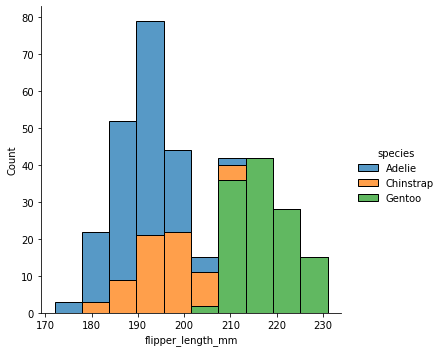

In [4]:
# posiion = 'stack'
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species', multiple = 'stack')

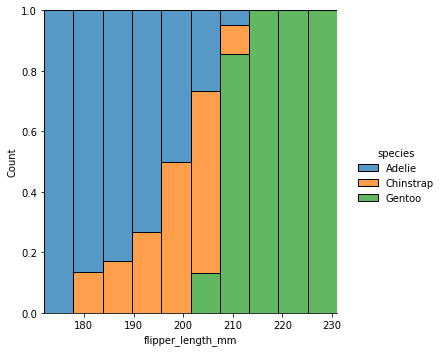

In [5]:
# position = 'filled'
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species', multiple = 'fill')

# Set axis label for multiple facets

**`FacetGrid.set_axis_labels`**

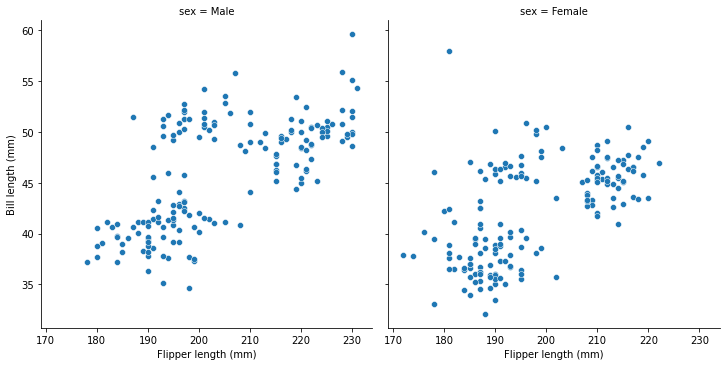

In [6]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

# Figure size

See here: <https://seaborn.pydata.org/tutorial/function_overview.html> the **Figure size** part. Basically, in matplotlib, we change the width and height of the whole figure, while in seaborn, each function provide a way to change the width, height and aspect ratio of each SUBPLOT

# Acessing Matplotlib containers

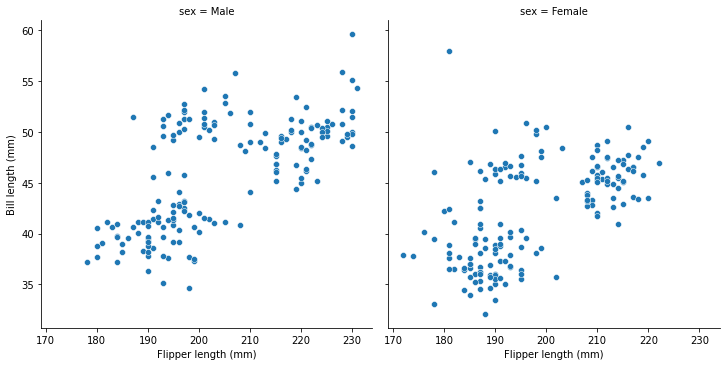

In [7]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

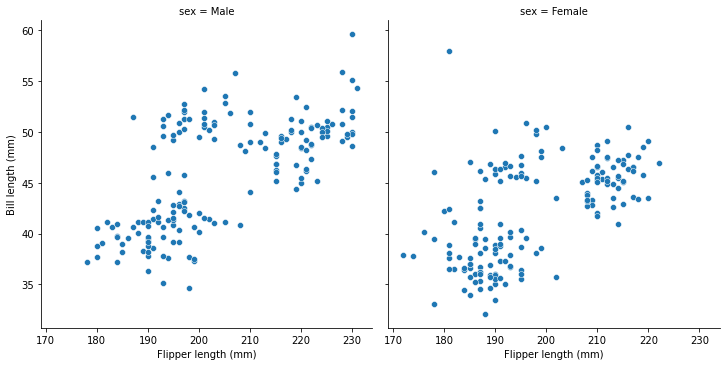

In [12]:
# figure, this is plt.figure()
g.fig

In [13]:
# axes
g.axes

array([[<AxesSubplot:title={'center':'sex = Male'}, xlabel='Flipper length (mm)', ylabel='Bill length (mm)'>,
        <AxesSubplot:title={'center':'sex = Female'}, xlabel='Flipper length (mm)'>]],
      dtype=object)

# Choosing histtype

using **`element`** keyword argument: `element = {'bars', 'step', 'poly'}`

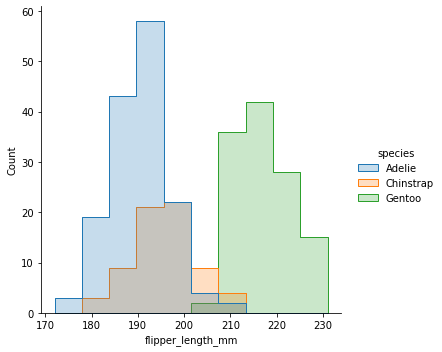

In [16]:
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species', element = 'step')

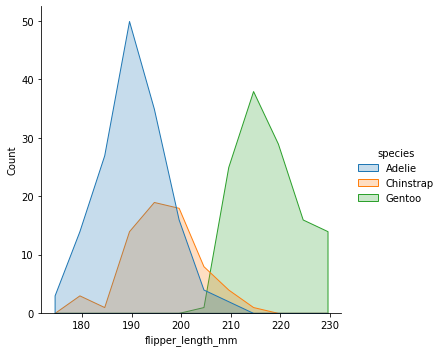

In [21]:
# geom_freqpoly()
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species', element = 'poly', binwidth = 5)

# Normalize histogram

set **`stat = density`**

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

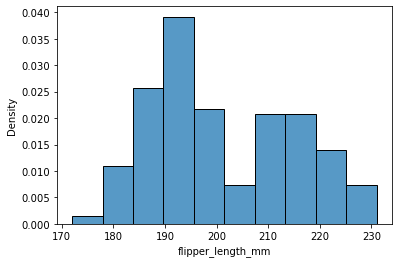

In [23]:
sns.histplot(data = penguins, x = 'flipper_length_mm', stat = 'density')

By default, however, the normalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting `common_norm=False`, each subset will be normalized independently:

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

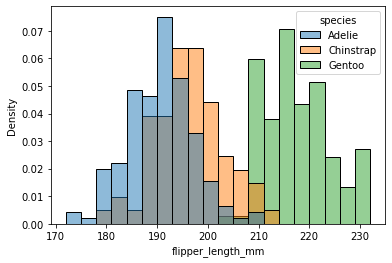

In [24]:
sns.histplot(data = penguins, x = 'flipper_length_mm', binwidth = 3, hue = 'species', stat = 'density', common_norm = False)

Density normalization scales the bars so that their areas sum to 1. As a result, the density axis is not directly interpretable. Another option is to normalize the bars to that their heights sum to 1. This makes most sense when the variable is discrete, but it is an option for all histograms:

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Probability'>

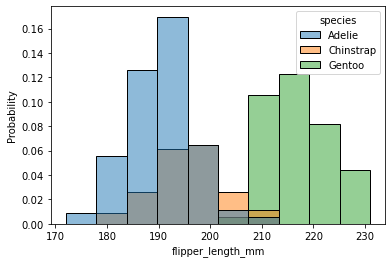

In [25]:
sns.histplot(data = penguins, x = 'flipper_length_mm', hue = 'species', stat = 'probability')

# Seaborn philosiphy 

Axes-level functions like **`sns.scatterplot()`**, **`sns.lineplot()`** use underline components from `matplotlib` like `plt.scatter`, `plt.plot`, ...  
If you want to further customize, you can pass keyword arguments of these underline functions to Axes-level functions, then it will be passed down to underline functions

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

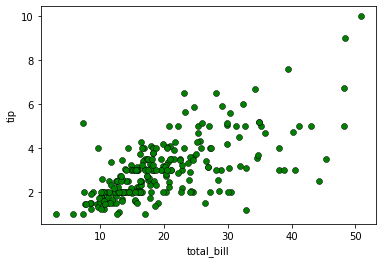

In [20]:
tips = sns.load_dataset('tips')
# color, ec is the keyword parameters of plt.scatter
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', color = 'green', ec = 'k')

Figure-level functions like **`sns.relplot()`**, **`sns.catplot()`**, are built under 2 components:
- A facet grid: **`sns.FacetGrid()`**
- A Axes-level function: **`sns.scatterplot`**, **`sns.lineplot`**, ...
    - when you are using a **Figure-level function**, if you want to change something that relates to facet, use **`facet_kws`**. These keyword arguments will be passed to **`sns.FacetGrid`** internally.  
    - Figure-level functions like **`sns.lmplot()`** use multiple underline components at the same time (e.g: **`sns.scatterplot`** for plotting points and **`sns.lineplot()`** for plotting regression line). To further customize, pass a dict to **`scatter_kws`** and **`line_kws`** keyword arguments of **`sns.lmplot()`**, these key-value pairs from dict will be passed as keyword arguments to lower level function **`sns.scatterplot`**, **`sns.lineplot()`**
    - Figure-level functions that only use an underline component like **`sns.displot`** (the underline component will depend on the **`kind`** of distribution we want to plot), use can just pass keyword argument of underline component directly to the Figure-level function, then these key-value pairs will be passed down as keyword arguments for the underline components 

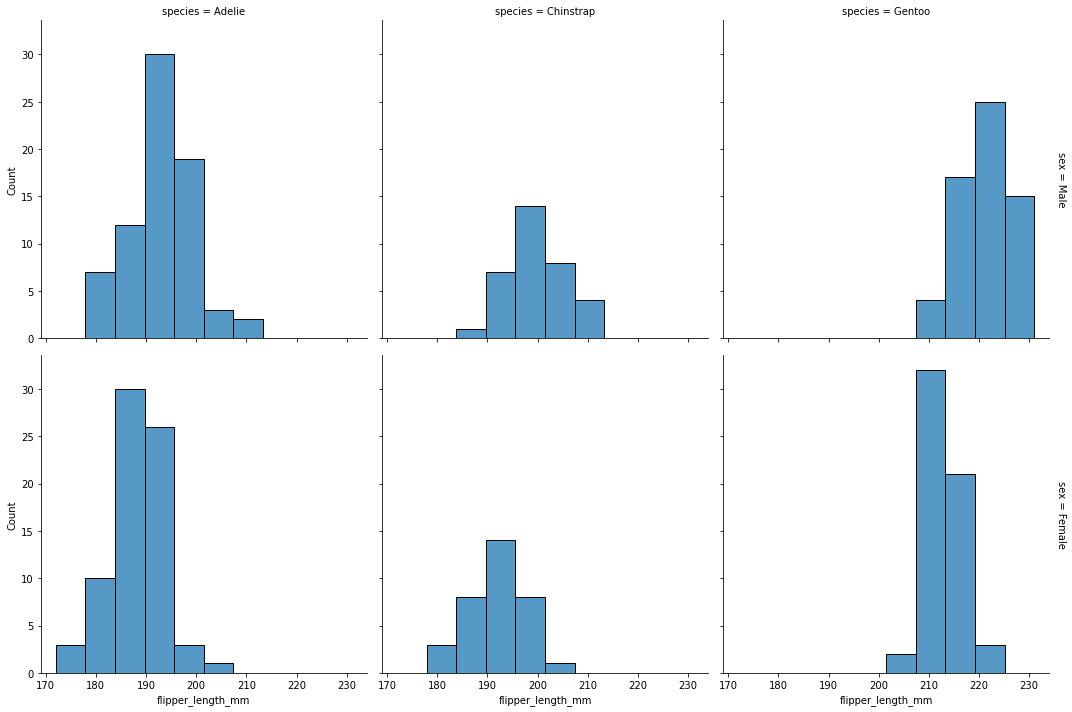

In [24]:
penguins = sns.load_dataset('penguins')
# Customize facet
sns.displot(data = penguins, col = 'species', row = 'sex', x = 'flipper_length_mm',
            facet_kws = dict(margin_titles = True))

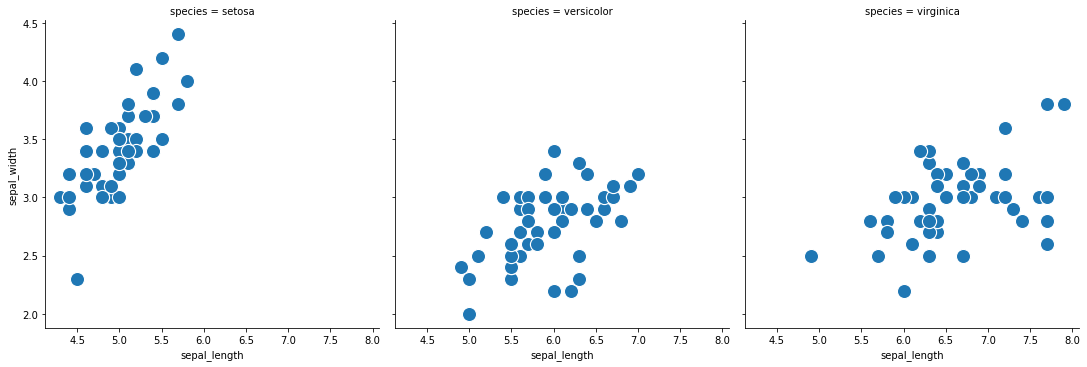

In [15]:
iris = sns.load_dataset('iris')
# pass `s = 200` to underline component `sns.scatterplot`
sns.relplot(data = iris, x = 'sepal_length', y = 'sepal_width', col = 'species', s = 200)

# Estimation

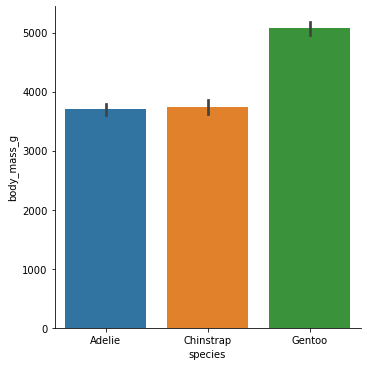

In [26]:
# 99% confidence interval, ci = 99
sns.catplot(data = penguins, x = 'species', y = 'body_mass_g', kind = 'bar', ci = 99)

Because confidence interval is calculated using bootstrapping, this can be computationally expensive for large dataset, so you better turn it off

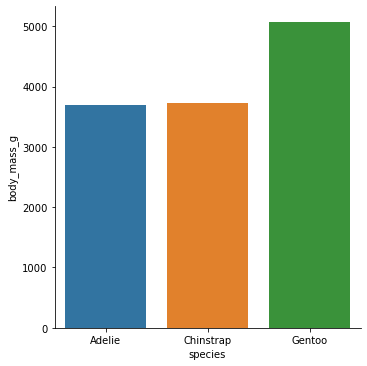

In [27]:
# ci = None
sns.catplot(data = penguins, x = 'species', y = 'body_mass_g', kind = 'bar', ci = None)

 Or you can use standard deviation instead of confidence interval

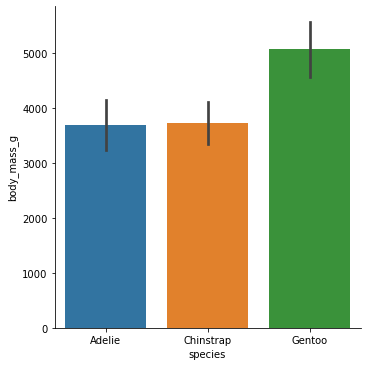

In [29]:
# ci = "sd"
sns.catplot(data = penguins, x = 'species', y = 'body_mass_g', ci = 'sd', kind = 'bar')

# Acess matplollib Container

For figure-level functions, it returns a **`Seaborn.axisgrid.FacetGrid`**

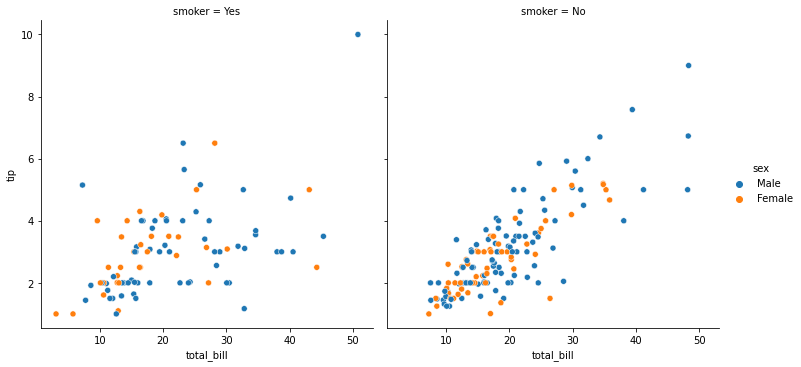

In [39]:
g = sns.relplot(data = tips, x = 'total_bill', y = 'tip', col = 'smoker', hue = 'sex')

Figure container

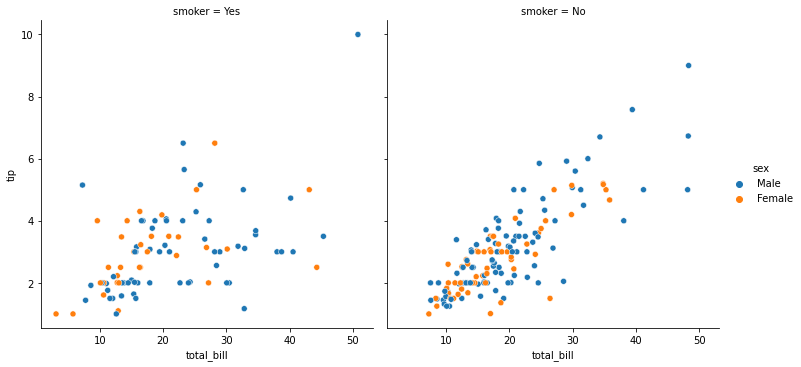

In [40]:
g.fig
# dir(g.fig)

---
Axes container

In [41]:
g.axes

array([[<AxesSubplot:title={'center':'smoker = Yes'}, xlabel='total_bill', ylabel='tip'>,
        <AxesSubplot:title={'center':'smoker = No'}, xlabel='total_bill'>]],
      dtype=object)

 set parameters for all facet: **`FacetGrid.set`**

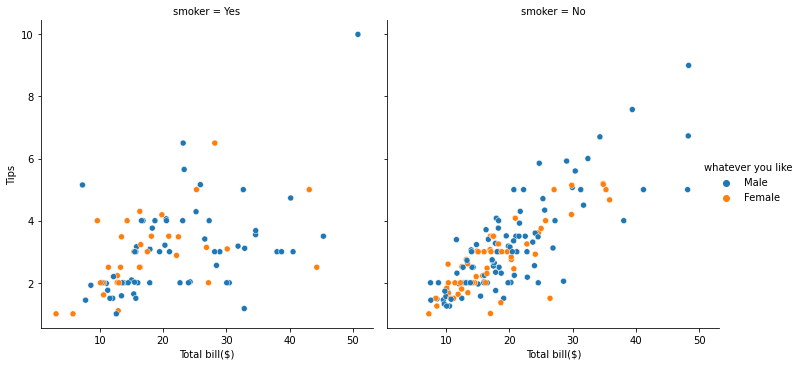

In [50]:
# this will apply for every Axes
# loop through each Axes in `FacetGrid.axes` to customize each Axes
g.set(xlabel = 'Total bill($)', ylabel = 'Tips')
g.fig

---
Axes-level function will return an Axes

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

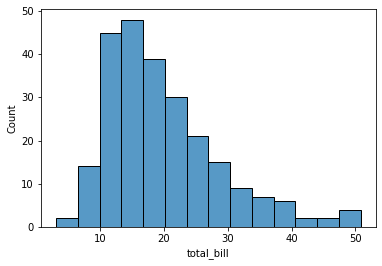

In [53]:
ax = sns.histplot(data = tips, x = 'total_bill')
ax

---
legend container (this will be `None` if there is no legend in the figure

In [51]:
g.legend

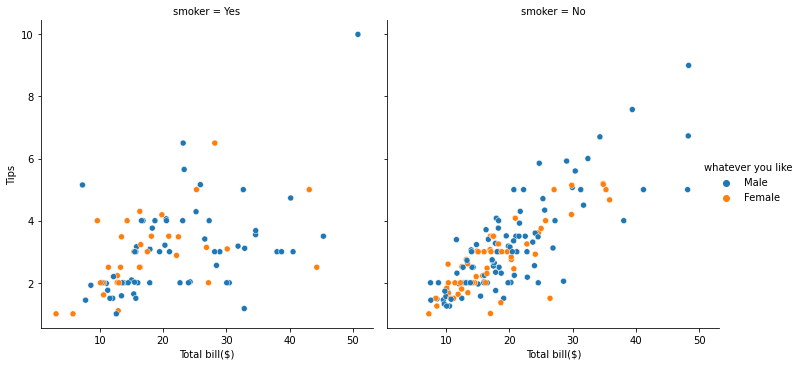

In [52]:
# customize legend via legend container
g.legend.set_title('whatever you like')
g.fig

# Split violins

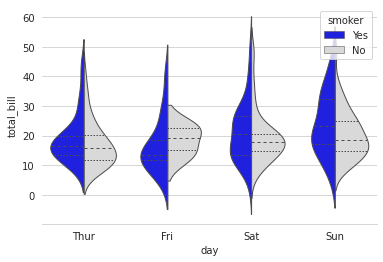

In [60]:
# split = True
sns.set_style('whitegrid')
sns.violinplot(data = tips, x = 'day', y = 'total_bill', split = True, hue = 'smoker', palette = dict(Yes = 'b', No = '.85'),
              inner = 'quart', linewidth = 1)
sns.despine(left = True)

# Stacked Histogram with log scale

In [64]:
diamonds = sns.load_dataset('diamonds')

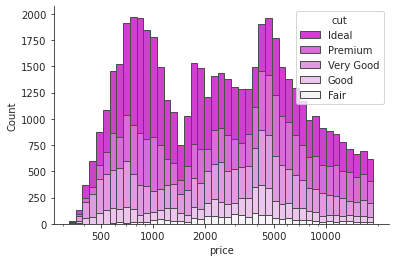

In [68]:
# log_scale = True, Equivalent log_scale = (10, 10) (default base 10, broadcast for 2 axis)
sns.set_style('ticks')
fig, ax = plt.subplots()
sns.despine(fig)
sns.histplot(data=diamonds, hue='cut', x='price', multiple='stack',
             palette='light:m_r', edgecolor='.3', log_scale=True, ax=ax)
ax.xaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])
plt.show()


# Log scale 

In [70]:
planets = sns.load_dataset('planets')

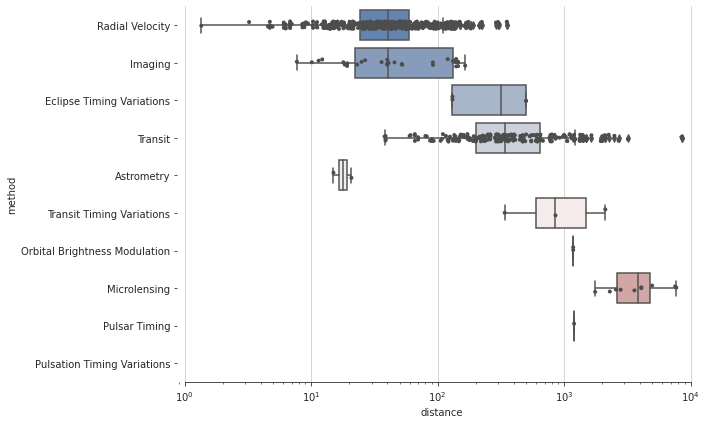

In [75]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.set_style('ticks')
sns.stripplot(data=planets, x='distance', y='method', color='.3', s=4)
sns.boxplot(data=planets, x='distance', y='method', palette='vlag')
ax.set_xscale('log')
sns.despine(left=True, trim=True)
ax.grid(axis='x')
fig.tight_layout()
